In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#read data
df = pd.read_csv('data.csv')

df = df.drop('customer_id', axis=1)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [149]:
#DETECT AND HANDLE MISSING VALUES AND DULICATES
print(df.isnull().sum())
print("Duplication: " , df.duplicated().sum())

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64
Duplication:  0


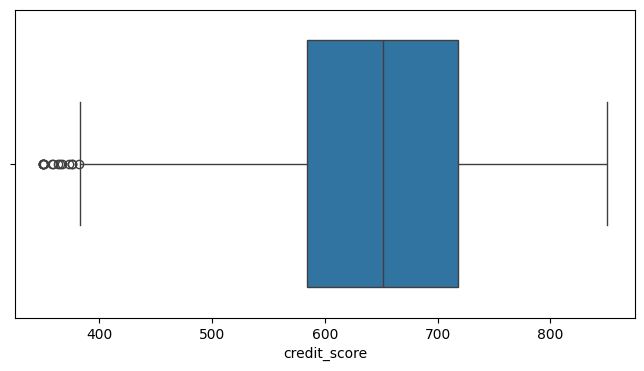

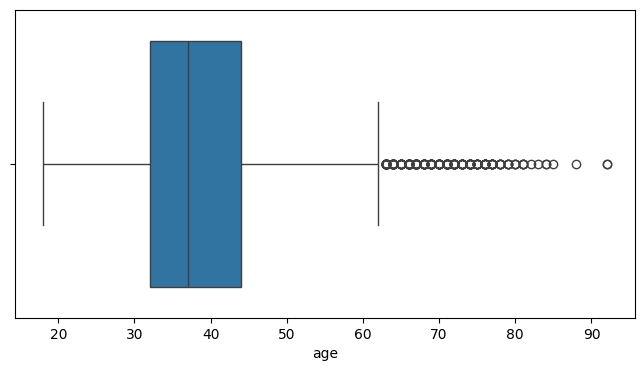

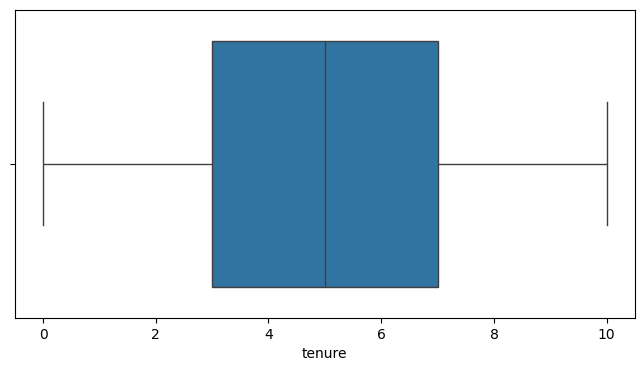

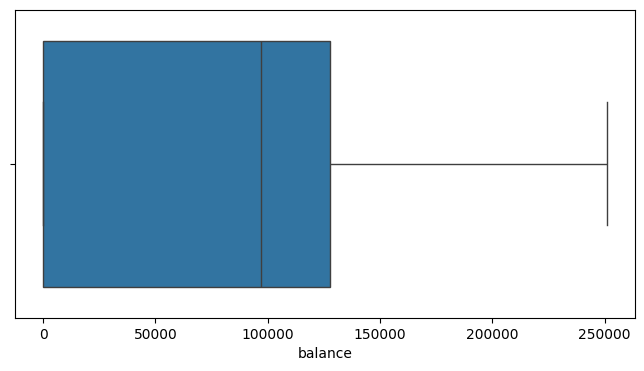

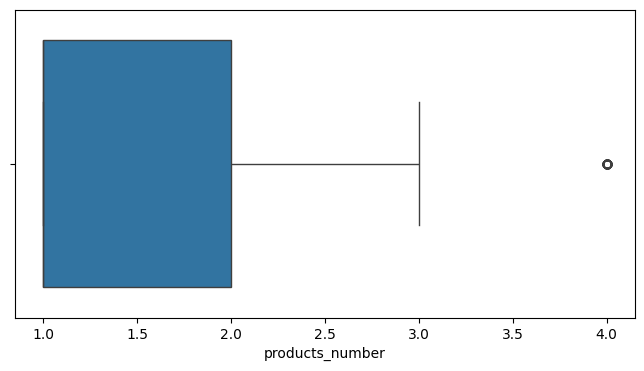

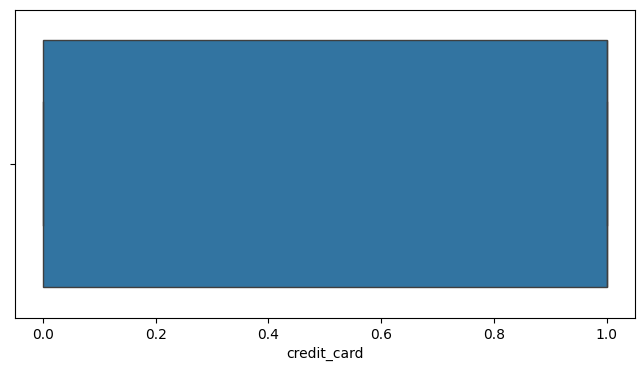

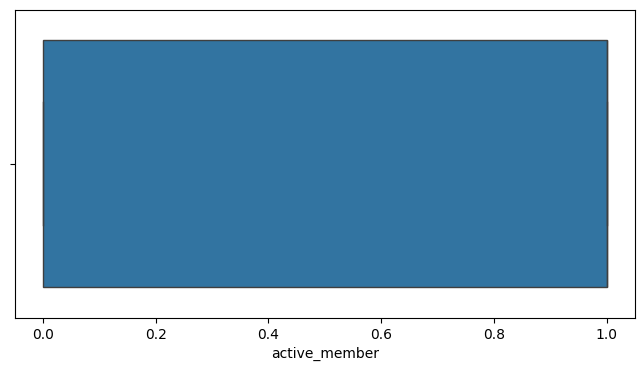

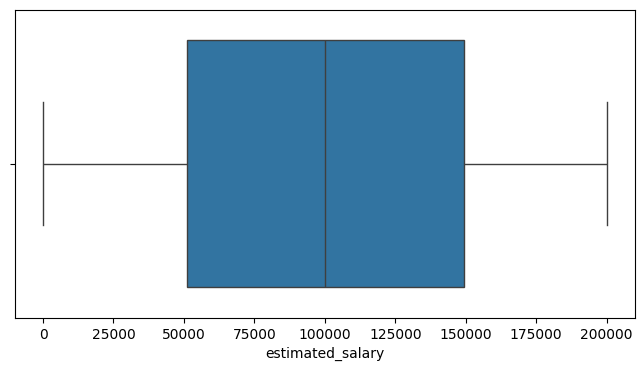

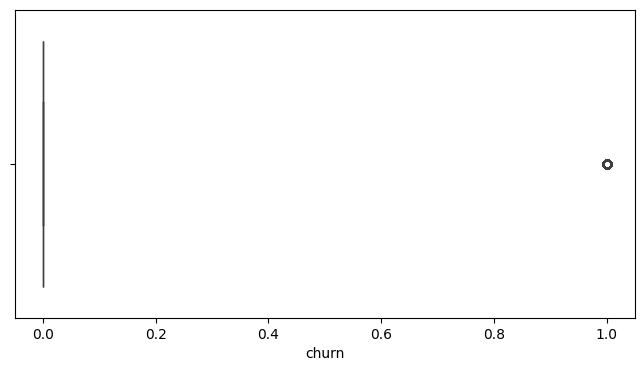

In [150]:
#outliers detection
for column in df.select_dtypes(include=('number')):
    plt.figure(figsize=(8,4))
    sns.boxplot(x=column, data=df)
    plt.show()

credit_score
False    9985
True       15
Name: count, dtype: int64


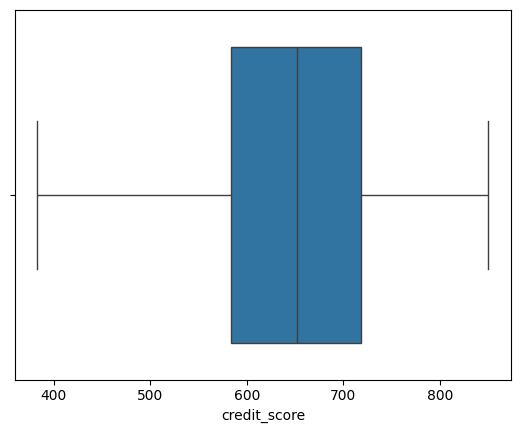

In [151]:
#outliers in credit_score and handling them
#IQR method Credit score
Q1 = df["credit_score"].quantile(0.25)
Q3 = df["credit_score"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (df['credit_score'] > upper_bound) | (df["credit_score"] < lower_bound)
print(outliers.value_counts())

df.loc[outliers, "credit_score"] = df["credit_score"].clip(383)
sns.boxplot(x=df['credit_score'])
plt.show()

In [152]:
#age outliers
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (df['age'] > upper_bound) | (df["age"] < lower_bound)
print(outliers.value_counts())
df["is_Elderly"] = 0
df.loc[(df["age"] > upper_bound), "is_Elderly"] = 1
df.loc[outliers, "age"] = df["age"].clip(lower_bound, upper_bound)



age
False    9641
True      359
Name: count, dtype: int64


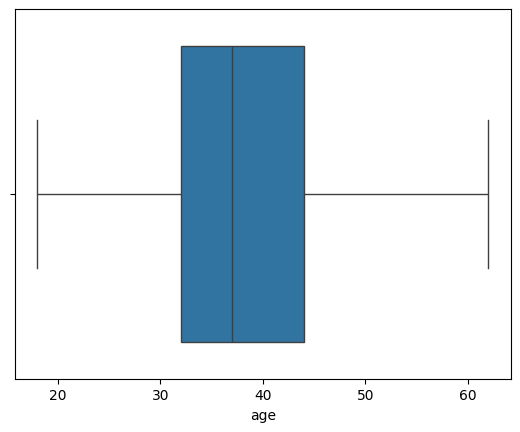

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,is_Elderly
58,511,Spain,Female,62,4,0.00,1,1,0,1643.11,1,1
85,652,Spain,Female,62,10,0.00,2,1,1,114675.75,0,1
104,670,Spain,Female,62,1,0.00,1,1,1,177655.68,1,1
158,646,France,Female,62,6,97259.25,1,0,1,104719.66,0,1
181,510,France,Male,62,2,0.00,2,1,1,48071.61,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9753,656,Germany,Male,62,7,153545.11,1,1,1,186574.68,0,1
9765,445,France,Male,62,2,136770.67,1,0,1,43678.06,0,1
9832,595,Germany,Female,62,2,105736.32,1,1,1,89935.73,1,1
9894,521,France,Female,62,6,0.00,2,1,1,49054.10,0,1


In [153]:
df['age'].describe()
sns.boxplot(x=df['age'])
plt.show()
df.head(3)
df[df['is_Elderly'] == 1]

In [154]:
df["low_credit_score"] = 0
df.loc[df["credit_score"] < 383, "low_credit_score"] = 1

df["vip_customer"] = 0
df.loc[(df["balance"] > df["balance"].quantile(0.70)) & (df["credit_score"] > df["credit_score"].quantile(0.70)) & (df["active_member"] == 1) & (df["credit_card"] >= 1), "vip_customer"] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  is_Elderly        10000 non-null  int64  
 12  low_credit_score  10000 non-null  int64  
 13  vip_customer      10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.1+ MB


In [155]:
#encoding categorical variables
df = pd.get_dummies(df,columns=['country'] ,prefix='country',dtype=int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   gender            10000 non-null  object 
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  is_Elderly        10000 non-null  int64  
 11  low_credit_score  10000 non-null  int64  
 12  vip_customer      10000 non-null  int64  
 13  country_France    10000 non-null  int64  
 14  country_Germany   10000 non-null  int64  
 15  country_Spain     10000 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memor

In [156]:
df.head(3)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,is_Elderly,low_credit_score,vip_customer,country_France,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0,1,0,0


In [157]:
#gender
from sklearn.preprocessing import LabelEncoder
laben_encoder = LabelEncoder()
df["gender"] = laben_encoder.fit_transform(df["gender"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   gender            10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  is_Elderly        10000 non-null  int64  
 11  low_credit_score  10000 non-null  int64  
 12  vip_customer      10000 non-null  int64  
 13  country_France    10000 non-null  int64  
 14  country_Germany   10000 non-null  int64  
 15  country_Spain     10000 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.

In [158]:
df.head(3)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,is_Elderly,low_credit_score,vip_customer,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,0,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,1,0,0


In [159]:
df["IsActiveWithbalance"] = 0
df.loc[(df["active_member"]==1) & (df["balance"]>0), "IsActiveWithbalance"]=1

df["IsActiveWithoutbalance"] = 0
df.loc[(df["active_member"]==1) & (df["balance"]==0), "IsActiveWithoutbalance"]=1

df["InactiveWithoutbalance"] = 0
df.loc[(df["active_member"]==0) & (df["balance"]==0), "InactiveWithoutbalance"]=1

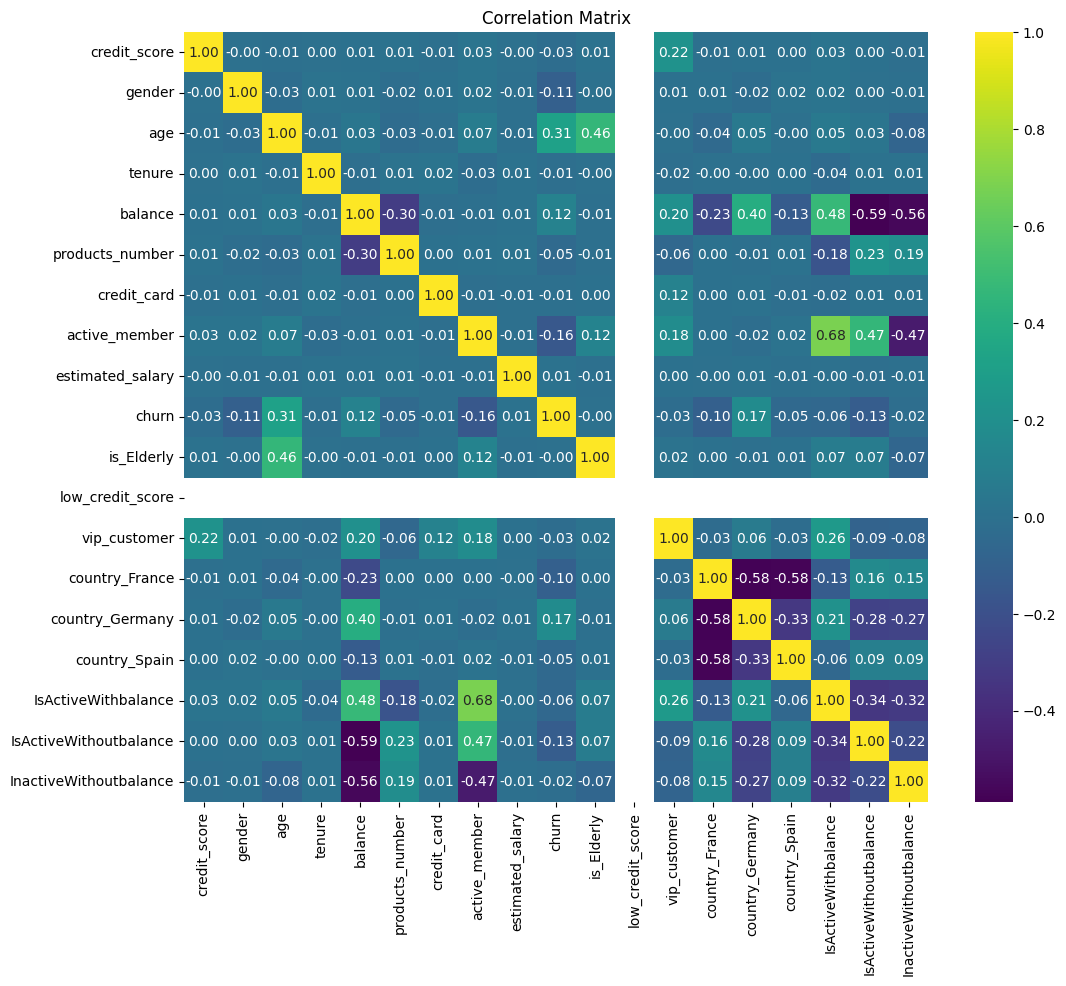

In [160]:
#correlation matrix
plt.figure(figsize=(12,10))
correlation_matrix = df.corr().select_dtypes(include=['number'])
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [161]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.drop(columns=["churn"],axis=1)
y = df["churn"]
X_scaled = scaler.fit_transform(x)

chi_scores = chi2(X_scaled,y)


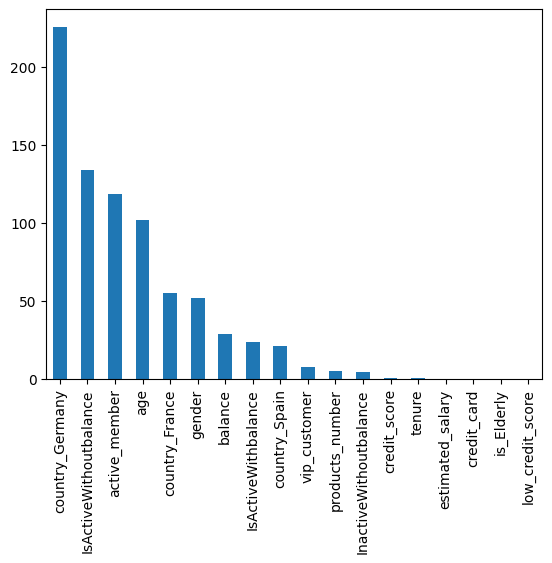

In [ ]:
#the higher the more important
chi_values =pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()
plt.show()

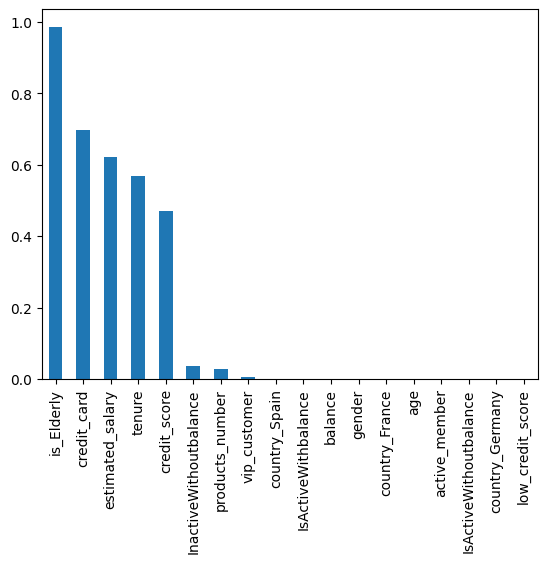

In [ ]:
#p-values higher the less important
p_values =pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()
plt.show()

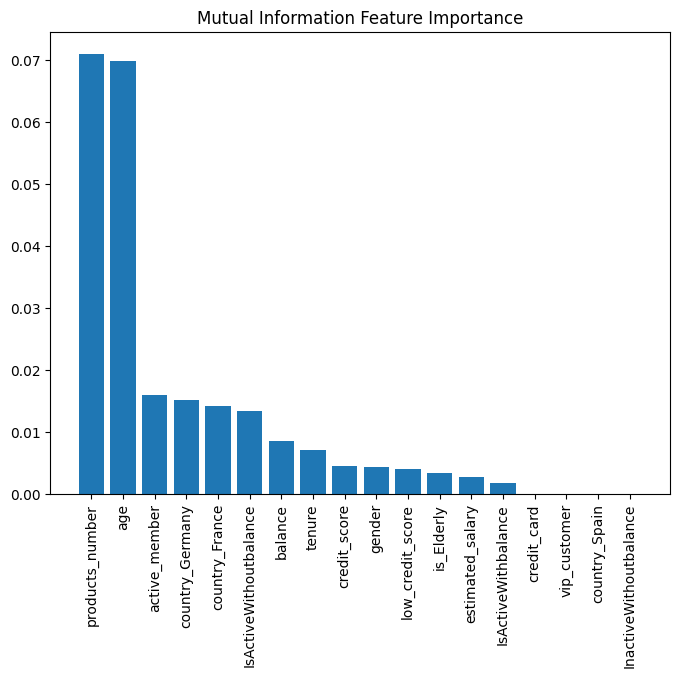

In [163]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(x,y,discrete_features='auto')
mi_df = pd.DataFrame({'df': x.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
plt.figure(figsize=(8,6))
plt.bar(mi_df['df'], mi_df['MI Score'])
plt.xticks(rotation=90)
plt.title("Mutual Information Feature Importance")
plt.show()

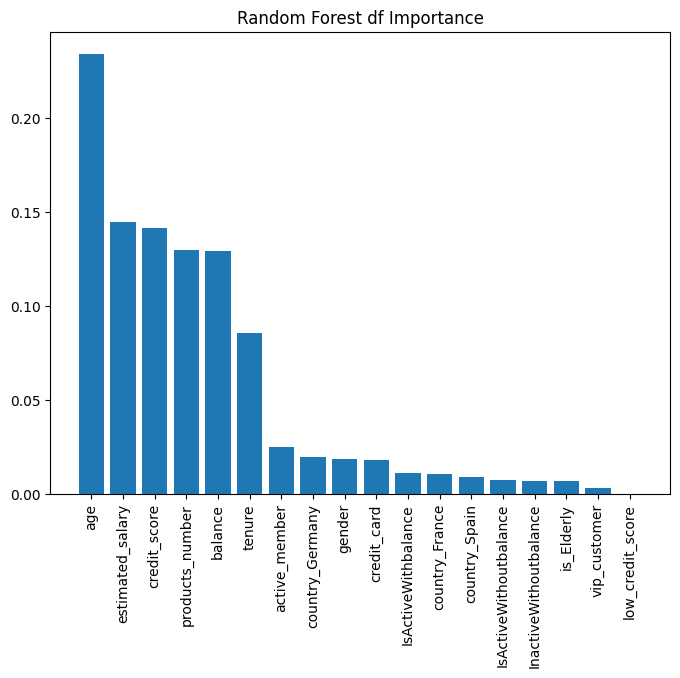

In [164]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("churn", axis=1)
y = df["churn"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
rf_df = pd.DataFrame({
    'df': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(8,6))
plt.bar(rf_df['df'], rf_df['Importance'])
plt.xticks(rotation=90)
plt.title("Random Forest df Importance")
plt.show()

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   credit_score            10000 non-null  int64  
 1   gender                  10000 non-null  int64  
 2   age                     10000 non-null  int64  
 3   tenure                  10000 non-null  int64  
 4   balance                 10000 non-null  float64
 5   products_number         10000 non-null  int64  
 6   credit_card             10000 non-null  int64  
 7   active_member           10000 non-null  int64  
 8   estimated_salary        10000 non-null  float64
 9   churn                   10000 non-null  int64  
 10  is_Elderly              10000 non-null  int64  
 11  low_credit_score        10000 non-null  int64  
 12  vip_customer            10000 non-null  int64  
 13  country_France          10000 non-null  int64  
 14  country_Germany         10000 non-null 